# Imports

In [1]:
import pandas as pd
from datetime import date
import pprint
import ast

from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

import io
import base64
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import dash
import dash.dcc as dcc
import dash.html as html
import plotly.graph_objects as go
from dash.dependencies import Input, Output
from collections import Counter

import numpy as np
import random

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS


import platform
#check python version
python_version = platform.python_version()
print(f"Python version: {python_version}")


Python version: 3.11.0


In [2]:
# NYT Dataset

df = pd.read_csv('nyt-metadata.csv',sep=',', low_memory=False)#, encoding='utf-8',


In [3]:
df.head()

,abstract,web_url,snippet,lead_paragraph,print_section,print_page,source,multimedia,headline,keywords,pub_date,document_type,news_desk,section_name,byline,type_of_material,_id,word_count,uri,subsection_name
0,Article on upcoming New York Giants-Dallas Cow...,https://www.nytimes.com/2000/01/01/sports/pro-...,Article on upcoming New York Giants-Dallas Cow...,Waiting in the visiting locker room at Texas S...,D,2.0,The New York Times,[],"{'main': 'Playoffs or No, Dallas Provides The ...","[{'name': 'organizations', 'value': 'New York ...",2000-01-01 05:00:00+00:00,article,Sports Desk,Sports,"{'original': 'By Bill Pennington', 'person': [...",News,nyt://article/01111a48-3502-5021-8096-bc929379...,819.0,nyt://article/01111a48-3502-5021-8096-bc929379...,NaN
1,Jeanne C Pond letter expresses hope that spiri...,https://www.nytimes.com/2000/01/01/opinion/l-o...,Jeanne C Pond letter expresses hope that spiri...,To the Editor:,A,30.0,The New York Times,[],"{'main': 'On This First Day, a Fanfare for the...","[{'name': 'persons', 'value': 'Pond, Jeanne C'...",2000-01-01 05:00:00+00:00,article,Editorial Desk,Opinion,"{'original': '', 'person': [], 'organization':...",Letter,nyt://article/02328edc-dad1-5eb0-900e-917162e4...,122.0,nyt://article/02328edc-dad1-5eb0-900e-917162e4...,NaN
2,Many experts on Y2K computer problem report th...,https://www.nytimes.com/2000/01/01/us/1-1-00-t...,Many experts on Y2K computer problem report th...,As the world slid nervously yesterday through ...,A,10.0,The New York Times,[],"{'main': ""Internet's Cheering Squad Nervously ...","[{'name': 'subject', 'value': 'Electronic Mail...",2000-01-01 05:00:00+00:00,article,National Desk,U.S.,"{'original': 'By Barnaby J. Feder', 'person': ...",News,nyt://article/02a8f89b-153f-5b84-983c-e328de5b...,761.0,nyt://article/02a8f89b-153f-5b84-983c-e328de5b...,NaN
3,WILL the forces of globalism continue to push ...,https://www.nytimes.com/2000/01/01/news/vision...,NaN,WILL the forces of globalism continue to push ...,E,4.0,The New York Times,[],{'main': 'Economic Thinking Finds a Free Marke...,[],2000-01-01 05:00:00+00:00,article,The Millennium,Archives,"{'original': 'By Floyd Norris', 'person': [{'f...",News,nyt://article/0634d837-97b8-59b5-aa17-f90d1a89...,916.0,nyt://article/0634d837-97b8-59b5-aa17-f90d1a89...,NaN
4,SPECIAL TODAY The Millennium Envisioning th...,https://www.nytimes.com/2000/01/01/nyregion/in...,NaN,SPECIAL TODAY,A,1.0,The New York Times,[],"{'main': 'INSIDE', 'kicker': None, 'content_ki...",[],2000-01-01 05:00:00+00:00,article,Metropolitan Desk,New York,"{'original': '', 'person': [], 'organization':...",Summary,nyt://article/0654cc64-c37f-594d-9290-1ce578cd...,102.0,nyt://article/0654cc64-c37f-594d-9290-1ce578cd...,NaN


In [4]:
df['pub_date'] = pd.to_datetime(df['pub_date'], errors='coerce').dt.date


In [5]:
print("df shape:", df.shape)

df shape: (2191517, 20)


In [6]:
# Select Time Intervals

start_date = date(2019, 6, 1)
end_date = date(2023, 6, 1)

df_filtered = df[(df['pub_date'] >= start_date) & (df['pub_date'] <= end_date)]

In [7]:
print(df_filtered['pub_date'].min())
print(df_filtered['pub_date'].max())

2019-06-01
2023-06-01


In [8]:
# Stock data

df2 = pd.read_csv('Stock_Market _Dataset _2.csv',sep=',', low_memory=False)

In [9]:
print("df2 shape:", df2.shape)

df2 shape: (1243, 39)


In [10]:
df2.head()

,Unnamed: 0,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,0,02-02-2024,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,...,"5,89,498",10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,"2,053.70",NaN
1,1,01-02-2024,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690.0,...,"5,81,600",9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,"2,071.10",260920.0
2,2,31-01-2024,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480.0,...,"5,78,020",9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,"2,067.40",238370.0
3,3,30-01-2024,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130.0,...,"5,84,680",9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,"2,050.90",214590.0
4,4,29-01-2024,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230.0,...,"5,78,800",13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,"2,034.90",1780.0


In [11]:
# Convert Date to correct format
df2['Date'] = pd.to_datetime(df2['Date'], format='%d-%m-%Y').dt.date

In [12]:
# Select Time intervals

df2 = df2[(df2['Date'] >= start_date) & (df2['Date'] <= end_date)]

In [13]:
print(df2['Date'].min())
print(df2['Date'].max())

2019-06-03
2023-06-01


In [14]:
# Print shapes of two data sets

print("df_filtered shape:", df_filtered.shape)
print("df2 shape:", df2.shape)

df_filtered shape: (208365, 20)
df2 shape: (992, 39)


In [15]:
# Print all column names of the datasets

print("df_filtered columns:", df_filtered.columns.tolist())
print("df2 columns:", df2.columns.tolist())

df_filtered columns: ['abstract', 'web_url', 'snippet', 'lead_paragraph', 'print_section', 'print_page', 'source', 'multimedia', 'headline', 'keywords', 'pub_date', 'document_type', 'news_desk', 'section_name', 'byline', 'type_of_material', '_id', 'word_count', 'uri', 'subsection_name']
df2 columns: ['Unnamed: 0', 'Date', 'Natural_Gas_Price', 'Natural_Gas_Vol.', 'Crude_oil_Price', 'Crude_oil_Vol.', 'Copper_Price', 'Copper_Vol.', 'Bitcoin_Price', 'Bitcoin_Vol.', 'Platinum_Price', 'Platinum_Vol.', 'Ethereum_Price', 'Ethereum_Vol.', 'S&P_500_Price', 'Nasdaq_100_Price', 'Nasdaq_100_Vol.', 'Apple_Price', 'Apple_Vol.', 'Tesla_Price', 'Tesla_Vol.', 'Microsoft_Price', 'Microsoft_Vol.', 'Silver_Price', 'Silver_Vol.', 'Google_Price', 'Google_Vol.', 'Nvidia_Price', 'Nvidia_Vol.', 'Berkshire_Price', 'Berkshire_Vol.', 'Netflix_Price', 'Netflix_Vol.', 'Amazon_Price', 'Amazon_Vol.', 'Meta_Price', 'Meta_Vol.', 'Gold_Price', 'Gold_Vol.']


# Merging

In [98]:
df_filtered = df_filtered.rename(columns={'date': 'Date'})

In [99]:
#merged = pd.merge(df_filtered, df2, left_on='pub_date', right_on='Date')

# Merge on 'date' with an outer join to keep all dates
merged_df = pd.merge(df_filtered, df2, on='Date', how='outer')

# Sort by date if needed
merged_df = merged_df.sort_values('Date')


display(merged_df)

,abstract,web_url,snippet,lead_paragraph,print_section,print_page,source,multimedia,headline,keywords,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,The state health secretary announced an inquir...,https://www.nytimes.com/2019/05/31/us/unc-chil...,The state health secretary announced an inquir...,North Carolina’s secretary of health on Friday...,A,13.0,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'North Carolina to Investigate After ...,"[{'name': 'subject', 'value': 'Hospitals', 'ra...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,"Corigliano’s First, an update from Amsterdam a...",https://www.nytimes.com/2019/06/01/arts/music/...,"Corigliano’s First, an update from Amsterdam a...",Readers and listeners! Hopefully you’re enjoyi...,NaN,NaN,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'An AIDS Symphony: The Week in Classi...,"[{'name': 'subject', 'value': 'Classical Music...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,Readers debate an issue raised by the Met’s an...,https://www.nytimes.com/2019/06/01/opinion/let...,Readers debate an issue raised by the Met’s an...,To the Editor:,SR,10.0,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...","{'main': 'Good Causes and Bad Money', 'kicker'...","[{'name': 'subject', 'value': 'Museums', 'rank...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,All but one of the dead were city workers. Her...,https://www.nytimes.com/2019/06/01/us/virginia...,All but one of the dead were city workers. Her...,A public works employee opened fire in a Virgi...,NaN,NaN,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'Who Were the 12 Victims in the Shoot...,"[{'name': 'subject', 'value': 'Virginia Beach,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,"In Guatemala, the homeland security secretary ...",https://www.nytimes.com/2019/06/01/world/ameri...,"In Guatemala, the homeland security secretary ...",GUATEMALA CITY — The tears that migrants tried...,A,19.0,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...","{'main': 'U.S. Promises Security Aid, but No F...","[{'name': 'glocations', 'value': 'Guatemala', ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208284,“There is an existential malaise that can come...,https://www.nytimes.com/2023/06/01/books/revie...,“There is an existential malaise that can come...,"Right now, there are three: “The Passenger,” b...",BR,10.0,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'S.A. Cosby Wishes More Writers Would...,"[{'name': 'subject', 'value': 'Books and Liter...",...,"4,92,000",5680.0,403.13,7140000.0,122.77,53780000.0,272.61,25280000.0,"1,995.50",176910.0
208283,Speech codes in the 1990s verged on self-satire.,https://www.nytimes.com/2023/06/01/opinion/col...,Speech codes in the 1990s verged on self-satire.,Back in the early ’90s it would have been hard...,NaN,NaN,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'Political Correctness Used to Be Fun...,"[{'name': 'subject', 'value': 'English Languag...",...,"4,92,000",5680.0,403.13,7140000.0,122.77,53780000.0,272.61,25280000.0,"1,995.50",176910.0
208282,A new report outlines Chinese efforts to mine ...,https://www.nytimes.com/2023/06/01/us/politics...,A new report outlines Chinese efforts to mine ...,China’s intelligence agencies are investing de...,NaN,NaN,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'China Investing in Open-Source Intel...,"[{'name': 'subject', 'value': 'International R...",...,"4,92,000",5680.0,403.13,7140000.0,122.77,53780000.0,272.61,25280000.0,"1,995.50",176910.0
208280,"“The Italian Lesson,” to be published on Subst...",https://www.nytimes.com/2023/06/01/books/e-jea...,"“The Ita

In [72]:
# Print shape of the merged data set

print("merged shape:", merged.shape)

merged shape: (172761, 59)


In [73]:
# Check column names

print("merged columns:", merged.columns.tolist())

merged columns: ['abstract', 'web_url', 'snippet', 'lead_paragraph', 'print_section', 'print_page', 'source', 'multimedia', 'headline', 'keywords', 'pub_date', 'document_type', 'news_desk', 'section_name', 'byline', 'type_of_material', '_id', 'word_count', 'uri', 'subsection_name', 'Unnamed: 0', 'Date', 'Natural_Gas_Price', 'Natural_Gas_Vol.', 'Crude_oil_Price', 'Crude_oil_Vol.', 'Copper_Price', 'Copper_Vol.', 'Bitcoin_Price', 'Bitcoin_Vol.', 'Platinum_Price', 'Platinum_Vol.', 'Ethereum_Price', 'Ethereum_Vol.', 'S&P_500_Price', 'Nasdaq_100_Price', 'Nasdaq_100_Vol.', 'Apple_Price', 'Apple_Vol.', 'Tesla_Price', 'Tesla_Vol.', 'Microsoft_Price', 'Microsoft_Vol.', 'Silver_Price', 'Silver_Vol.', 'Google_Price', 'Google_Vol.', 'Nvidia_Price', 'Nvidia_Vol.', 'Berkshire_Price', 'Berkshire_Vol.', 'Netflix_Price', 'Netflix_Vol.', 'Amazon_Price', 'Amazon_Vol.', 'Meta_Price', 'Meta_Vol.', 'Gold_Price', 'Gold_Vol.']


In [100]:
# Select only specific columns to keep in the  merged data set 
merged = merged_df

columns_to_keep = ['Date','abstract','keywords', 'headline', 'Natural_Gas_Price', 'Natural_Gas_Vol.', 'Crude_oil_Price', 'Crude_oil_Vol.', 'Copper_Price', 'Copper_Vol.', 'Bitcoin_Price', 'Bitcoin_Vol.', 'Platinum_Price', 'Platinum_Vol.', 'Ethereum_Price', 'Ethereum_Vol.', 'S&P_500_Price', 'Nasdaq_100_Price', 'Nasdaq_100_Vol.', 'Apple_Price', 'Apple_Vol.', 'Tesla_Price', 'Tesla_Vol.', 'Microsoft_Price', 'Microsoft_Vol.', 'Silver_Price', 'Silver_Vol.', 'Google_Price', 'Google_Vol.', 'Nvidia_Price', 'Nvidia_Vol.', 'Berkshire_Price', 'Berkshire_Vol.', 'Netflix_Price', 'Netflix_Vol.', 'Amazon_Price', 'Amazon_Vol.', 'Meta_Price', 'Meta_Vol.', 'Gold_Price', 'Gold_Vol.']
merged = merged[columns_to_keep]

# Stock-related columns to forward-fill
stock_columns = ['Natural_Gas_Price', 'Natural_Gas_Vol.', 'Crude_oil_Price', 'Crude_oil_Vol.', 'Copper_Price', 'Copper_Vol.', 'Bitcoin_Price', 'Bitcoin_Vol.', 'Platinum_Price', 'Platinum_Vol.', 'Ethereum_Price', 'Ethereum_Vol.', 'S&P_500_Price', 'Nasdaq_100_Price', 'Nasdaq_100_Vol.', 'Apple_Price', 'Apple_Vol.', 'Tesla_Price', 'Tesla_Vol.', 'Microsoft_Price', 'Microsoft_Vol.', 'Silver_Price', 'Silver_Vol.', 'Google_Price', 'Google_Vol.', 'Nvidia_Price', 'Nvidia_Vol.', 'Berkshire_Price', 'Berkshire_Vol.', 'Netflix_Price', 'Netflix_Vol.', 'Amazon_Price', 'Amazon_Vol.', 'Meta_Price', 'Meta_Vol.', 'Gold_Price', 'Gold_Vol.']
merged[stock_columns] = merged[stock_columns].fillna(method='ffill')

# News-related columns to fill with empty string
news_columns = ['abstract','keywords', 'headline']
merged[news_columns] = merged[news_columns].fillna('')

merged

/var/folders/tf/yfrtqxh92938x95w2khgrgj40000gp/T/ipykernel_22737/3681962226.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/tf/yfrtqxh92938x95w2khgrgj40000gp/T/ipykernel_22737/3681962226.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,abstract,keywords,headline,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,2019-06-01,The state health secretary announced an inquir...,"[{'name': 'subject', 'value': 'Hospitals', 'ra...",{'main': 'North Carolina to Investigate After ...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,2019-06-01,"Corigliano’s First, an update from Amsterdam a...","[{'name': 'subject', 'value': 'Classical Music...",{'main': 'An AIDS Symphony: The Week in Classi...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,2019-06-01,Readers debate an issue raised by the Met’s an...,"[{'name': 'subject', 'value': 'Museums', 'rank...","{'main': 'Good Causes and Bad Money', 'kicker'...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,2019-06-01,All but one of the dead were city workers. Her...,"[{'name': 'subject', 'value': 'Virginia Beach,...",{'main': 'Who Were the 12 Victims in the Shoot...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,2019-06-01,"In Guatemala, the homeland security secretary ...","[{'name': 'glocations', 'value': 'Guatemala', ...","{'main': 'U.S. Promises Security Aid, but No F...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208284,2023-06-01,“There is an existential malaise that can come...,"[{'name': 'subject', 'value': 'Books and Liter...",{'main': 'S.A. Cosby Wishes More Writers Would...,2.158,210620.0,70.1,395390.0,3.711,85920.0,...,"4,92,000",5680.0,403.13,7140000.0,122.77,53780000.0,272.61,25280000.0,"1,995.50",176910.0
208283,2023-06-01,Speech codes in the 1990s verged on self-satire.,"[{'name': 'subject', 'value': 'English Languag...",{'main': 'Political Correctness Used to Be Fun...,2.158,210620.0,70.1,395390.0,3.711,85920.0,...,"4,92,000",5680.0,403.13,7140000.0,122.77,53780000.0,272.61,25280000.0,"1,995.50",176910.0
208282,2023-06-01,A new report outlines Chinese efforts to mine ...,"[{'name': 'subject', 'value': 'International R...",{'main': 'China Investing in Open-Source Intel...,2.158,210620.0,70.1,395390.0,3.711,85920.0,...,"4,92,000",5680.0,403.13,7140000.0,122.77,53780000.0,272.61,25280000.0,"1,995.50",176910.0
208280,2023-06-01,"“The Italian Lesson,” to be published on Subst...","[{'name': 'subject', 'value': 'Books and Liter...",{'main': 'Mary Trump and E. Jean Carroll Are C...,2.158,210620.0,70.1,395390.0,3.711,85920.0,...,"4,92,000",5680.0,403.13,7140000.0,122.77,53780000.0,272.61,25280000.0,"1,995.50",176910.0


In [101]:
# Check if there are any NaN values
print(merged.isna().any().any())

True


In [102]:
# Check which column contain NaN values. We keep them as they are at the moment. 

#nan_rows = merged[merged.isna().any(axis=1)]
#print(nan_rows)

print(merged.isna().sum())

Date                     0
abstract                 0
keywords                 0
headline                 0
Natural_Gas_Price      196
Natural_Gas_Vol.       196
Crude_oil_Price        196
Crude_oil_Vol.         196
Copper_Price           196
Copper_Vol.            196
Bitcoin_Price          196
Bitcoin_Vol.           196
Platinum_Price         196
Platinum_Vol.        62763
Ethereum_Price         196
Ethereum_Vol.          196
S&P_500_Price          196
Nasdaq_100_Price       196
Nasdaq_100_Vol.        196
Apple_Price            196
Apple_Vol.             196
Tesla_Price            196
Tesla_Vol.             196
Microsoft_Price        196
Microsoft_Vol.         196
Silver_Price           196
Silver_Vol.            196
Google_Price           196
Google_Vol.            196
Nvidia_Price           196
Nvidia_Vol.            196
Berkshire_Price        196
Berkshire_Vol.         196
Netflix_Price          196
Netflix_Vol.           196
Amazon_Price           196
Amazon_Vol.            196
M

In [103]:
# FOR THE DATASET FOR POWER BI

# Clean and extract values
# Convert string to actual list of dictionaries and extract 'value' fields from col 'abstract'

import ast
def extract_values(cell):
    try:
        parsed = ast.literal_eval(cell)
        return ', '.join(d.get('value', '') for d in parsed if isinstance(d, dict))
    except (ValueError, SyntaxError):
        return ''

# Apply the function
merged['keywords'] = merged['keywords'].apply(extract_values)


# Show the result
print(merged['keywords'][0])

Hospitals, Children and Childhood, Heart, Surgery and Surgeons, UNC Children's Hospital


/var/folders/tf/yfrtqxh92938x95w2khgrgj40000gp/T/ipykernel_22737/2276437809.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [104]:
# FOR THE DATASET FOR POWER BI

# Extract 'main' from the stringified dict in column 'headline'

def extract_main(headline_str):
    try:
        headline_dict = ast.literal_eval(headline_str)
        return headline_dict.get('main', '')
    except (ValueError, SyntaxError):
        return ''

# Apply the function to the column
merged['headline'] = merged['headline'].apply(extract_main)

# Print result
print(merged['headline'][0])

North Carolina to Investigate After Concerns Raised at Children’s Hospital


/var/folders/tf/yfrtqxh92938x95w2khgrgj40000gp/T/ipykernel_22737/3773765986.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [105]:
# Some numerical values were in str. format, convirt them to float

def clean_number(val):
    if isinstance(val, str):
        val = val.replace(',', '').strip()
        try:
            return float(val)
        except ValueError:
            return None
    return val


merged.loc[:,'Natural_Gas_Price':'Gold_Vol.'] = merged.loc[:, 'Natural_Gas_Price':'Gold_Vol.'].applymap(clean_number)
merged.head(10)                                                                                                     #astype(float)

,Date,abstract,keywords,headline,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,2019-06-01,The state health secretary announced an inquir...,"Hospitals, Children and Childhood, Heart, Surg...",North Carolina to Investigate After Concerns R...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,2019-06-01,"Corigliano’s First, an update from Amsterdam a...","Classical Music, National Sawdust (Brooklyn, N...",An AIDS Symphony: The Week in Classical Music,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,2019-06-01,Readers debate an issue raised by the Met’s an...,"Museums, Philanthropy, OxyContin (Drug), Metro...",Good Causes and Bad Money,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,2019-06-01,All but one of the dead were city workers. Her...,"Virginia Beach, Va, Shooting (2019), Murders, ...",Who Were the 12 Victims in the Shooting in Vir...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,2019-06-01,"In Guatemala, the homeland security secretary ...","Guatemala, McAleenan, Kevin K, Homeland Securi...","U.S. Promises Security Aid, but No Funds, to G...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,2019-06-01,The administration’s plan could end up becomin...,"United States International Relations, United ...",Trump’s Middle East Peace Plan Faces a Crossro...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,2019-06-01,Richard Silvestri sets us up for a difficult e...,,Variety: Cryptic Crossword,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,2019-06-01,Vancouver is riveted by the murder trial of a ...,"Murders, Attempted Murders and Homicides, Vanc...","A Tale of Murder, Revenge and a Canadian Immig...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,2019-06-01,"Jan-Lennard Struff, 29, reached the fourth rou...","Tennis, French Open (Tennis), Dimitrov, Grigor...",Breakthroughs Are Not Just for the Young at th...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,2019-06-01,"In the digital world, to believe that you have...","Social Media, Philosophy",The Myth That Defines Our Age,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
import pandas as pd
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS


# Convert date to datetime
merged['Date'] = pd.to_datetime(merged['Date'])

# Clean text function
def clean_text(text):
    if pd.isnull(text):
        return ""
    text = text.translate(str.maketrans('', '', string.punctuation)).lower()
    words = text.split()
    filtered_words = [word for word in words if word not in ENGLISH_STOP_WORDS]
    return " ".join(filtered_words)

# Clean headlines
merged['cleaned_headline'] = merged['headline'].apply(clean_text)

# List of financial columns to keep (everything except 'headline' and 'cleaned_headline')
financial_columns = stock_columns

# Drop duplicates to avoid multiple rows per date
df_unique = merged.drop_duplicates(subset=['Date'])

# Aggregate cleaned headlines per date
headline_agg = merged.groupby('Date')['cleaned_headline'].agg(lambda x: ' '.join(x)).reset_index()

# Merge aggregated headlines with financial data (assuming financial data is already daily)
final_df = pd.merge(headline_agg, df_unique[["Date"] + [col for col in financial_columns if col != 'headline']], on='Date', how='left')

# Save to CSV
final_df.to_csv("nyt_financial_data_for_powerbi.csv", index=False)

print("✅ Final dataset saved as 'nyt_financial_data_for_powerbi.csv'")


/var/folders/tf/yfrtqxh92938x95w2khgrgj40000gp/T/ipykernel_22737/4161897519.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/tf/yfrtqxh92938x95w2khgrgj40000gp/T/ipykernel_22737/4161897519.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



✅ Final dataset saved as 'nyt_financial_data_for_powerbi.csv'


In [106]:
# Save dataset as csv file if needed

merged.to_csv('correct_merged_cleaned.csv', index=False)

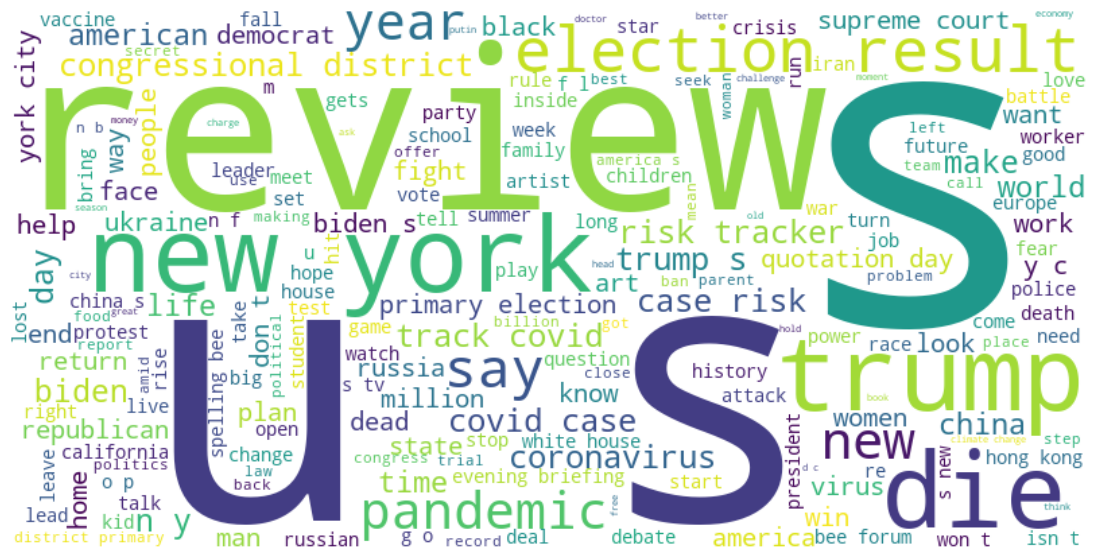

In [108]:
# Combine all headlines into one string
text = " ".join(headline for headline in merged['headline'])

# Optional: Remove stop words
words = text.lower().split()
filtered_words = [word for word in words if word not in ENGLISH_STOP_WORDS]
cleaned_text = " ".join(filtered_words)

# Generate the wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_text)

# Show it
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

import pandas as pd
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Step 1: Load & normalize column names immediately
df = pd.read_csv("correct_merged_cleaned.csv")
df.columns = df.columns.str.lower()  # Make all column names lowercase

# Step 2: Convert the lowercase 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Step 3: Remove any duplicated columns
df = df.loc[:, ~df.columns.duplicated()]

# Step 4: Clean the headline text
def clean_text(text):
    if pd.isnull(text):
        return ""
    text = text.translate(str.maketrans('', '', string.punctuation)).lower()
    words = text.split()
    return " ".join([word for word in words if word not in ENGLISH_STOP_WORDS])

df['cleaned_headline'] = df['headline'].apply(clean_text)

# Step 5: Group headlines by date
grouped = df.groupby('date')['cleaned_headline'].agg(lambda x: ' '.join(x)).reset_index()

# Step 6: Extract bigrams and trigrams using CountVectorizer
vectorizer = CountVectorizer(ngram_range=(2, 3), stop_words='english')
X = vectorizer.fit_transform(grouped['cleaned_headline'])
phrases = vectorizer.get_feature_names_out()

# Step 7: Convert bigram/trigram matrix to DataFrame
phrase_freq = pd.DataFrame(X.toarray(), columns=phrases)
phrase_freq['date'] = grouped['date']

# Step 8: Prepare financial data (excluding raw headline columns)
financial_columns = [col for col in df.columns if col not in ['headline', 'cleaned_headline']]
df_unique = df.drop_duplicates(subset=['date'])
financial_data = df_unique[['date'] + [col for col in financial_columns if col not in ['headline', 'cleaned_headline']]]

# Ensure 'date' is datetime and lowercase
phrase_freq.columns = phrase_freq.columns.str.lower()
financial_data.columns = financial_data.columns.str.lower()

# Drop duplicated columns by name (in case any slipped through)
phrase_freq = phrase_freq.loc[:, ~phrase_freq.columns.duplicated()]
financial_data = financial_data.loc[:, ~financial_data.columns.duplicated()]

# Debug print to confirm
#print("phrase_freq columns:", phrase_freq.columns.tolist())
#print("financial_data columns:", financial_data.columns.tolist())
print("phrase_freq columns sample:", phrase_freq.columns[:10].tolist(), f"... total: {len(phrase_freq.columns)}")
print("financial_data columns sample:", financial_data.columns[:10].tolist(), f"... total: {len(financial_data.columns)}")

# Merge safely
final_df = pd.merge(phrase_freq, financial_data, on='date', how='left')

# Step 9: Merge phrases with financial data
#final_df = pd.merge(phrase_freq, financial_data, on='date', how='left')

# Step 10: Export to CSV
final_df.to_csv("nyt_bigram_phrase_matrix.csv", index=False)
print("✅ File with bigram/trigram phrases saved as 'nyt_bigram_phrase_matrix.csv'")


phrase_freq columns sample: ['00 draw', '00 draw new', '001 percent', '001 percent vedette', '007 16thcentury', '007 16thcentury french', '007 memorable', '007 memorable theme', '00s college', '00s college debate'] ... total: 1937671
financial_data columns sample: ['date', 'abstract', 'keywords', 'natural_gas_price', 'natural_gas_vol.', 'crude_oil_price', 'crude_oil_vol.', 'copper_price', 'copper_vol.', 'bitcoin_price'] ... total: 40


# Learn components of specific columns 

## This code is for creating the Dashboard in Jupyter Notebook

In [79]:
# Show the first 3 rows of 'keywords' 
for i in range(3):
    pprint.pprint(merged.loc[i, 'keywords'])

("[{'name': 'subject', 'value': 'News and News Media', 'rank': 1, 'major': "
 "'N'}, {'name': 'subject', 'value': 'Television', 'rank': 2, 'major': 'N'}, "
 "{'name': 'subject', 'value': 'Presidential Election of 2020', 'rank': 3, "
 "'major': 'N'}, {'name': 'organizations', 'value': 'Fox News Channel', "
 "'rank': 4, 'major': 'N'}, {'name': 'persons', 'value': 'Gillibrand, Kirsten "
 "E', 'rank': 5, 'major': 'N'}, {'name': 'persons', 'value': 'Sanders, "
 "Bernard', 'rank': 6, 'major': 'N'}, {'name': 'persons', 'value': 'Trump, "
 "Donald J', 'rank': 7, 'major': 'N'}, {'name': 'persons', 'value': 'Warren, "
 "Elizabeth', 'rank': 8, 'major': 'N'}, {'name': 'persons', 'value': 'de "
 "Blasio, Bill', 'rank': 9, 'major': 'N'}, {'name': 'persons', 'value': "
 "'McCain, Meghan', 'rank': 10, 'major': 'N'}, {'name': 'creative_works', "
 "'value': 'The View (TV Program)', 'rank': 11, 'major': 'N'}]")
("[{'name': 'persons', 'value': 'Trump, Donald J', 'rank': 1, 'major': 'N'}, "
 "{'name': 'glo

In [81]:
# Convert string to list of dicts safely

merged['keywords'] = merged['keywords'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [82]:

def safe_eval(val):
    try:
        return ast.literal_eval(val) if isinstance(val, str) else val
    except (ValueError, SyntaxError):
        return None  # or [] if you prefer an empty list

merged['keywords'] = merged['keywords'].apply(safe_eval)

merged = merged[merged['keywords'].notna()]


In [83]:
# Show the first 3 rows of 'keywords' 
for i in range(3):
    pprint.pprint(merged.loc[i, 'headline'])

("{'main': 'The Fox News Primary? How Trump’s Favorite Network Became a "
 "Democratic Power Player', 'kicker': None, 'content_kicker': None, "
 "'print_headline': 'How Fox  Is Infiltrating A Primary', 'name': None, 'seo': "
 "None, 'sub': None}")
("{'main': 'Trump Administration Considered Tariffs on Australia', 'kicker': "
 "None, 'content_kicker': None, 'print_headline': 'President Pondered Tariffs "
 "On Australian Imports, Too', 'name': None, 'seo': None, 'sub': None}")
("{'main': 'For the Chao Family, Deep Ties to the World’s 2 Largest "
 "Economies', 'kicker': None, 'content_kicker': None, 'print_headline': '', "
 "'name': None, 'seo': None, 'sub': None}")


# Extract keywords/abstracts/headlines/snippets for 1 day

In [84]:
# Filter for rows after 2019-06-03
filtered = merged[merged['pub_date'] > date(2022, 3, 3)]

# Extract keyword 'value's
all_keywords = []

for row in filtered['keywords']:
    if isinstance(row, list):
        values = [item.get('value') for item in row if isinstance(item, dict)]
        all_keywords.extend(values)

# Print a few sample keywords
print(all_keywords[:20])

['Presidential Election of 2020', 'Midterm Elections (2022)', 'Republican Party', 'Hice, Jody (1960- )', 'Raffensperger, Brad', 'Georgia', 'Project: Democracy', 'United States Economy', 'Labor and Jobs', 'Unemployment', 'Inflation (Economics)', 'Biden, Joseph R Jr', 'United States Politics and Government', 'News and News Media', 'Russian Invasion of Ukraine (2022)', 'Politics and Government', 'Democracy (Theory and Philosophy)', 'Liberalism (US Politics)', 'Foreign Aid', 'Putin, Vladimir V']


In [85]:
# Filter the dataset
filtered = merged[merged['pub_date'] > date(2019, 6, 3)]

# Display full abstracts (first five)
for abstract in filtered['abstract'].head(5):
    print(abstract)
    print('-' * 80)

At stake is whether places like Silicon Valley, Seattle, Salt Lake City, San Francisco or Los Angeles might be forced to shut down after a direct hit.
--------------------------------------------------------------------------------
Chynal Lindsey was found dead less than a month after another woman, Muhlaysia Booker, was fatally shot.
--------------------------------------------------------------------------------
In Congress, Mr. Boehner “unalterably opposed” legalizing marijuana. Now he’s pushing for it, with a $20 million Big Weed payday on the line.
--------------------------------------------------------------------------------
Despite what party leaders say, ordinary people care about Trump’s lawbreaking.
--------------------------------------------------------------------------------
Self-confidence is just one element in a triad of things that make up our overall “confidence.” Here’s what you can do to boost yours.
---------------------------------------------------------------

In [86]:
# Filter the dataset for a different date to see the difference in the news
filtered = merged[merged['pub_date'] > date(2022, 3, 3)]

# Display full abstracts (first few)
for abstract in filtered['headline'].head(10):
    print(abstract)
    print('-' * 80)

{'main': 'In Georgia, 2020 Is Still on the Ballot', 'kicker': None, 'content_kicker': None, 'print_headline': '', 'name': None, 'seo': None, 'sub': None}
--------------------------------------------------------------------------------
{'main': 'America’s Very Peculiar Economic Funk', 'kicker': 'Paul Krugman', 'content_kicker': None, 'print_headline': 'America’s Very Peculiar Economic Funk', 'name': None, 'seo': None, 'sub': None}
--------------------------------------------------------------------------------
{'main': 'The Week That Awoke the World', 'kicker': 'David Brooks', 'content_kicker': None, 'print_headline': 'The Week That Awoke the World', 'name': None, 'seo': None, 'sub': None}
--------------------------------------------------------------------------------
{'main': 'Panel Suggests Trump Knew He Lost the Election, Eyeing Criminal Case', 'kicker': None, 'content_kicker': None, 'print_headline': 'Trump Ignored Pleas on Election Lies, Panel Says', 'name': None, 'seo': None, 'su

In [82]:
# Filter the dataset
filtered = merged[merged['pub_date'] > date(2022, 3, 3)]

# Display full abstracts (first few)
for abstract in filtered['snippet'].head(20):
    print(abstract)
    print('-' * 80)

A normally sleepy secretary of state race has become a critical barometer of Republicans’ views of the last election — and of Trump.
--------------------------------------------------------------------------------
Negative views of the economy don’t match people’s experience.
--------------------------------------------------------------------------------
What the Ukrainians have taught us.
--------------------------------------------------------------------------------
At the core of the theory of a possible criminal case against former President Donald J. Trump is the argument that he knew he had lost the election and sought to overturn it anyway.
--------------------------------------------------------------------------------
The Indian American golfer is consistently finding his game as a rookie on tour, but he still lives with his parents and drives a regular old car.
--------------------------------------------------------------------------------
A Mets ace, Max Scherzer stands t

# Visualization

## Plot Word Bubble and Barplot from Keywords over some period 

In [87]:
start = date(2022, 5, 31)
end = date(2023, 5, 31)

one_week = merged[(merged['pub_date'] >= start) & (merged['pub_date'] < end)]

In [88]:

#Convert keywords column from string to list of dicts (if not done yet)
one_week['keywords'] = one_week['keywords'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

/var/folders/tf/yfrtqxh92938x95w2khgrgj40000gp/T/ipykernel_22737/1926881769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_week['keywords'] = one_week['keywords'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


In [89]:
#Extract all keyword "value" entries
all_keywords = []

for row in one_week['keywords']:
    if isinstance(row, list):
        values = [item.get('value') for item in row if isinstance(item, dict)]
        all_keywords.extend(values)

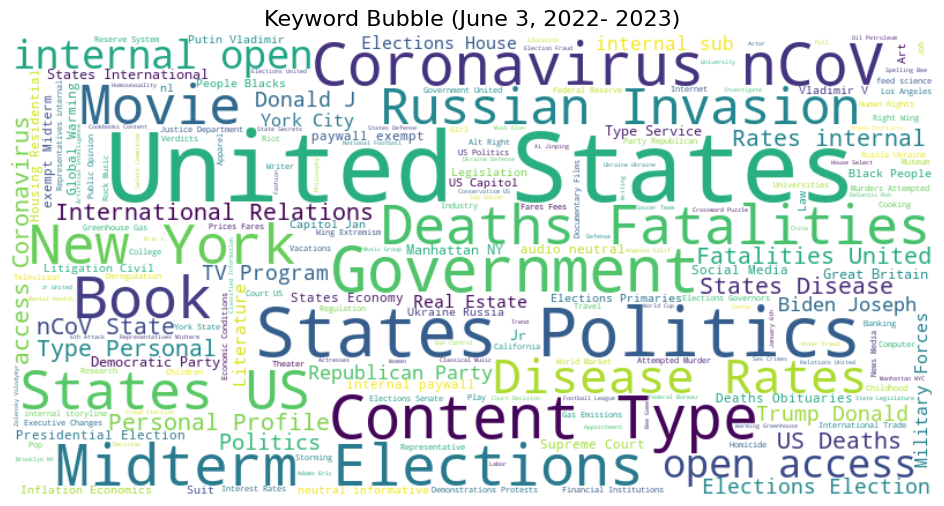

In [92]:
# Plot word bubble over the selected period

# Join keywords into a single string
text = ' '.join(all_keywords)

# Create and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Keyword Bubble (June 3, 2022- 2023)', fontsize=16)
plt.show()

/var/folders/tf/yfrtqxh92938x95w2khgrgj40000gp/T/ipykernel_22737/1432466538.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_week['keywords'] = one_week['keywords'].apply(safe_eval)


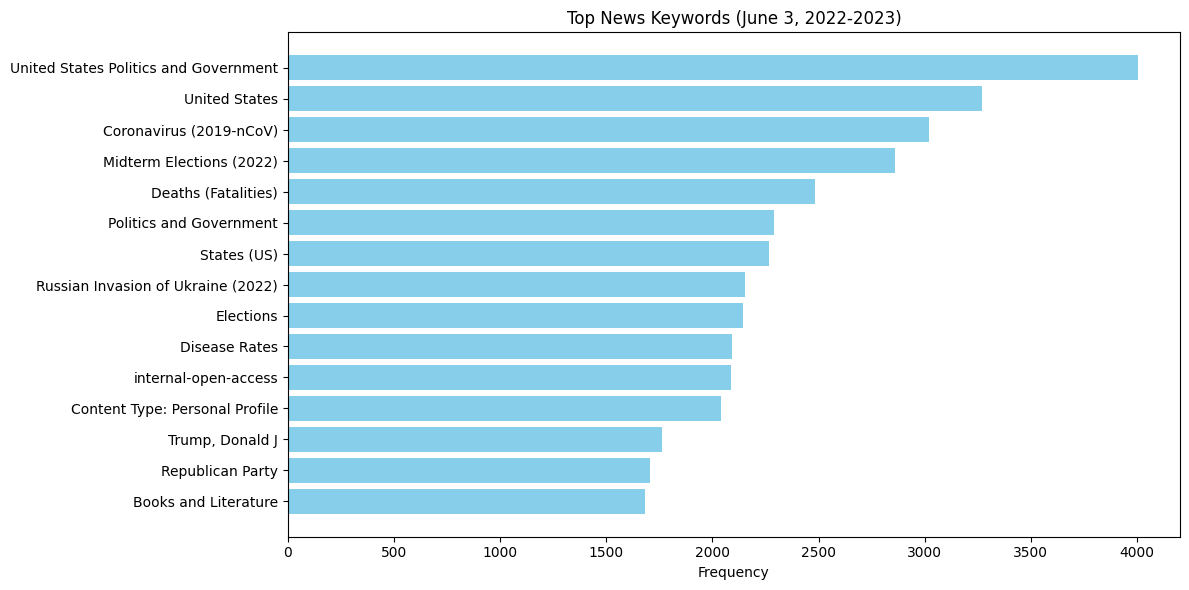

In [93]:
# Plot frequency of word appearance over the selcted period 

start = date(2022, 5, 31)
end = date(2023, 5, 31)

one_week = merged[(merged['pub_date'] >= start) & (merged['pub_date'] < end)]


one_week['keywords'] = one_week['keywords'].apply(safe_eval)

#Extract keyword values
all_keywords = []

for row in one_week['keywords']:
    if isinstance(row, list):
        values = [item.get('value') for item in row if isinstance(item, dict)]
        all_keywords.extend(values)

# Count and plot top N
keyword_counts = Counter(all_keywords)
top_keywords = keyword_counts.most_common(15)  # Change number to see more/fewer

# Unzip for plotting
labels, counts = zip(*top_keywords)

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.barh(labels, counts, color='skyblue')
plt.xlabel('Frequency')
plt.title('Top News Keywords (June 3, 2022-2023)')
plt.gca().invert_yaxis()  # Highest at the top
plt.tight_layout()
plt.show()


# Dashboard test

This is a toy example. The goal is to create a working dashboard either in PowerBI or with other methods. Above we plotted the WordCloud and Frequency of keywords mentioned in NYT over a selcted period. 

Now on a toy example we are trying to test how the potential dashboard should look like. We manged to create a 'slider' with the help of which we can select a timeframe. Based on the this interval we will plot line plots of stocks and volumes. Simultaniously there will be a WordCloud showing the keywords and their frequency over the period. Another plot should disply a treemap for stocks.

Currently not everything works as expected. The lineplot, barplot and treemap are plotted with Plotly, while WordCloud uses a different library. The positioning of WordCould must be improved, and treemap does not correctly reflect the values. 

In [94]:
# We generate 90 days of data for the purpose of tuning the dashboard
date_range = pd.date_range(start='2023-01-01', periods=90, freq='D')

# Fake stock prices (simulate some noise)
np.random.seed(42)
tesla_prices = np.cumsum(np.random.normal(loc=0.5, scale=2, size=90)) + 150
netflix_prices = np.cumsum(np.random.normal(loc=0.3, scale=1.5, size=90)) + 320

# Keyword pool to randomly sample from
keyword_pool = ['AI', 'Cloud', 'Streaming', 'Growth', 'Merger', 'Earnings', 'Inflation', 'Regulation', 'Innovation', 'Ad Revenue']

# Create fake keywords per day
keywords = []
for _ in range(90):
    num_keywords = random.randint(1, 5)
    day_keywords = [{'value': random.choice(keyword_pool)} for _ in range(num_keywords)]
    keywords.append(day_keywords)

# Create DataFrame
merged = pd.DataFrame({
    'Date': date_range,
    'Tesla_Price': tesla_prices,
    'Netflix_Price': netflix_prices,
    'keywords': keywords
})

# Initialize the Dash app
app = dash.Dash(__name__)

# Define layout
app.layout = html.Div([
    html.H2("Stock Prices & Keywords Viewer"),
    
    dcc.Graph(id='line-plot'),

    html.Br(),
    html.Label("Select Date Range:"),
    dcc.DatePickerRange(
        id='date-range',
        start_date=merged['Date'].min(),
        end_date=merged['Date'].max(),
        display_format='YYYY-MM-DD',
    ),

    html.Br(), html.Hr(),

    # Use vertical stacking (column layout)
    html.Div([
        html.Div([
            html.H4("Top Keywords Bar Chart"),
            dcc.Graph(id='word-bar', style={'height': '500px'})  # Bar chart with fixed height
        ], style={'padding': '10px'}),

        html.Div([
            html.H4("Keyword Bubble (Selected Interval)"),
            dcc.Graph(id='word-bubble', style={'height': '500px'})  # Word cloud below with fixed height
        ], style={'padding': '10px'}),
    ], style={'width': '100%', 'display': 'block'}),  # Stack the elements vertically

    html.Br(), html.Hr(),

    html.Div([
        html.H4("Stock Performance Treemap"),
        dcc.Graph(id='stock-treemap')
    ])
])

# Line plot callback
@app.callback(
    Output('line-plot', 'figure'),
    Input('date-range', 'start_date'),
    Input('date-range', 'end_date')
)
def update_line_plot(start_date, end_date):
    fig = go.Figure()
    for company in ['Tesla_Price', 'Netflix_Price']:
        fig.add_trace(go.Scatter(
            x=merged['Date'],
            y=merged[company],
            mode='lines+markers',
            name=company
        ))
    fig.update_layout(title='Stock Prices (Full Range)', xaxis_title='Date', yaxis_title='Price')
    return fig

# Word bubble, bar chart, and treemap callback
@app.callback(
    Output('word-bubble', 'figure'),
    Output('word-bar', 'figure'),
    Output('stock-treemap', 'figure'),
    Input('date-range', 'start_date'),
    Input('date-range', 'end_date'),
)
def update_keyword_plots(start_date, end_date):
    # Filter data for the selected date range
    df_filtered = merged[(merged['Date'] >= pd.to_datetime(start_date)) &
                         (merged['Date'] <= pd.to_datetime(end_date))]

    # Collect all keywords from the selected date range
    all_keywords = []
    for row in df_filtered['keywords']:
        if isinstance(row, list):
            all_keywords.extend([item['value'] for item in row if isinstance(item, dict)])

    # Generate the word cloud using Matplotlib
    text = ' '.join(all_keywords)
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

    # Save the word cloud as an image in memory
    img = io.BytesIO()
    wordcloud.to_image().save(img, format='PNG')
    img.seek(0)
    wordcloud_image = base64.b64encode(img.getvalue()).decode('utf-8')

    # Create WordCloud figure for Dash
    wordcloud_fig = {
        'data': [],
        'layout': {
            'images': [
                {
                    'source': 'data:image/png;base64,{}'.format(wordcloud_image),
                    'xref': 'paper',
                    'yref': 'paper',
                    'x': 0.5,
                    'y': 0.5,
                    'sizex': 1,
                    'sizey': 1,
                    'sizing': 'stretch',
                    'opacity': 1,
                    'layer': 'below'
                }
            ],
            'xaxis': {
                'showgrid': False,
                'zeroline': False,
                'visible': False,
                'range': [0, 1]
            },
            'yaxis': {
                'showgrid': False,
                'zeroline': False,
                'visible': False,
                'range': [0, 1]
            },
            'height': 500,
            'margin': dict(l=10, r=10, t=30, b=10),
        }
    }

    # Bar chart of top keywords
    counter = Counter(all_keywords)
    top_keywords = counter.most_common(15)
    if top_keywords:
        labels, freqs = zip(*top_keywords)
    else:
        labels, freqs = [], []

    bar_fig = go.Figure(go.Bar(
        x=freqs,
        y=labels,
        orientation='h',
        marker_color='skyblue'
    ))
    bar_fig.update_layout(
        title='Top Keywords Bar Chart',
        xaxis_title='Frequency',
        yaxis=dict(autorange='reversed'),
        height=500
    )

    # Stock Performance Treemap
    # Calculate the stock price change (percentage) for the selected date range
    stock_changes = {
        'Tesla_Price': (merged['Tesla_Price'].iloc[-1] - merged['Tesla_Price'].iloc[0]) / merged['Tesla_Price'].iloc[0] * 100,
        'Netflix_Price': (merged['Netflix_Price'].iloc[-1] - merged['Netflix_Price'].iloc[0]) / merged['Netflix_Price'].iloc[0] * 100
    }

    # Create a Treemap (Heatmap) based on stock performance
    stock_data = {
        'stock': list(stock_changes.keys()),
        'performance': list(stock_changes.values()),
        'color': ['green' if change > 0 else 'red' for change in stock_changes.values()]
    }

    treemap_fig = go.Figure(go.Treemap(
        labels=stock_data['stock'],
        parents=[''] * len(stock_data['stock']),
        values=stock_data['performance'],
        marker=dict(colors=stock_data['performance'], colorscale='RdYlGn', showscale=True),
        textinfo="label+value+percent entry"
    ))

    treemap_fig.update_layout(title="Stock Performance Treemap", height=400)

    return wordcloud_fig, bar_fig, treemap_fig

if __name__ == '__main__':
    app.run(debug=True)
